## TEST

In [3]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype

from toolbox_ML import (
    get_features_num_regression,
    plot_features_num_regression,
    describe_df,
    tipifica_variables
)






1️⃣ tipifica_variables(df, umbral_categoria, umbral_continua)  

Lo que pide el enunciado (resumen):  

Cuenta la cardinalidad (nº de valores únicos) de cada columna.  

Reglas típicas del profe:  

2 valores únicos → Binaria  

cardinalidad < umbral_categoria → Categórica  
 
cardinalidad ≥ umbral_categoria → miras el % de cardinalidad:  

si %card ≥ umbral_continua → “Numérica Continua”  

si no → “Numérica Discreta”  

In [4]:
def tipifica_variables(df, umbral_categoria, umbral_continua):
    """
    Clasifica variables según su cardinalidad.

    Reglas:
    - 2 valores únicos -> 'Binaria'
    - cardinalidad < umbral_categoria -> 'Categórica'
    - cardinalidad >= umbral_categoria:
        * si (cardinalidad / n_filas) >= umbral_continua -> 'Numerica Continua'
        * si no -> 'Numerica Discreta'
    """

    resultados = []
    n_filas = len(df)

    for col in df.columns:
        serie = df[col]
        cardinalidad = serie.nunique(dropna=True)

        if cardinalidad == 2:
            tipo = "Binaria"
        elif cardinalidad < umbral_categoria:
            tipo = "Categórica"
        else:
            # cardinalidad >= umbral_categoria => miramos % cardinalidad
            pct_card = (cardinalidad / n_filas) if n_filas > 0 else 0

            if pct_card >= umbral_continua:
                tipo = "Numerica Continua"
            else:
                tipo = "Numerica Discreta"

        resultados.append({"nombre_variable": col, "tipo_sugerido": tipo})

    return pd.DataFrame(resultados)


In [5]:
df = pd.read_csv("./data/lifesat_full.csv")
tipos = tipifica_variables(df, umbral_categoria=10, umbral_continua=0.3)
print(tipos)


        nombre_variable      tipo_sugerido
0               Country  Numerica Continua
1  GDP per capita (USD)  Numerica Continua
2     Life satisfaction  Numerica Continua
3       Life expectancy  Numerica Continua
4         Homicide rate  Numerica Continua
5       Employment rate  Numerica Continua


['GDP per capita (USD)', 'Life expectancy', 'Employment rate']


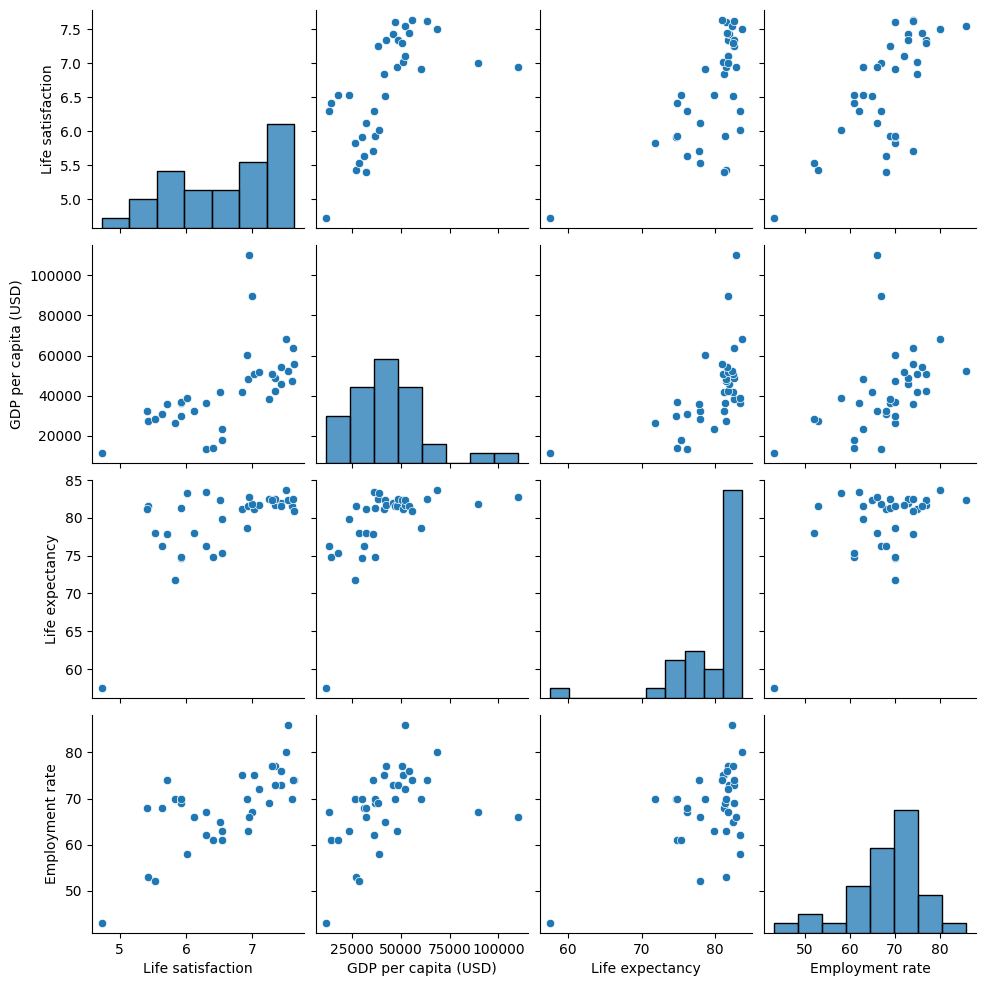

['GDP per capita (USD)', 'Life expectancy', 'Employment rate']

In [6]:
import pandas as pd

df = pd.read_csv("./data/lifesat_full.csv")

# 1. Probar selección
cols_sel = get_features_num_regression(df, "Life satisfaction", umbral_corr=0.3, pvalue=0.05)
print(cols_sel)

# 2. Probar gráficos
plot_features_num_regression(df, "Life satisfaction", [], 0.3, 0.05)
